# Regression Model Evaluation 

Regression Models produces numeric outputs.

i.e 
- What's the cost of the flight?
- How much revenue can my business generate for the quarter? 

To evaluate how good model predictions are we need to check predictions against previously unseen smaples that were not used for training. Usually, the dataset is split 30% for testing, 70% for training. 

Common techniques for model performance evaluation are: 
- Visually observing Plots 
- Residual Histograms 
- Evaluate metrics like RMSE (Root Mean Square Error)

In [2]:
!pip install pandas numpy matplotlib scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.metrics import mean_squared_error

## Air Passengers Data 

In [5]:
models = ['Model 1','Model 2', 'Model 3', 'Model 4']
df = pd.read_csv('../data/airpassengers_sample.csv', index_col=0)

In [6]:
df.head()

,GDP,Population,Passengers,Model1_Prediction,Model2_Prediction,Model3_Prediction,Model4_Prediction
Year,,,,,,,
2008,14.72,304.09,701.78,710,701,850,750
2009,14.42,306.77,679.42,650,670,450,750
2010,14.96,309.34,720.50,700,715,1000,750
2011,15.52,311.64,730.80,750,735,550,750
2012,16.16,313.99,736.70,769,740,700,750


## Plot Data 

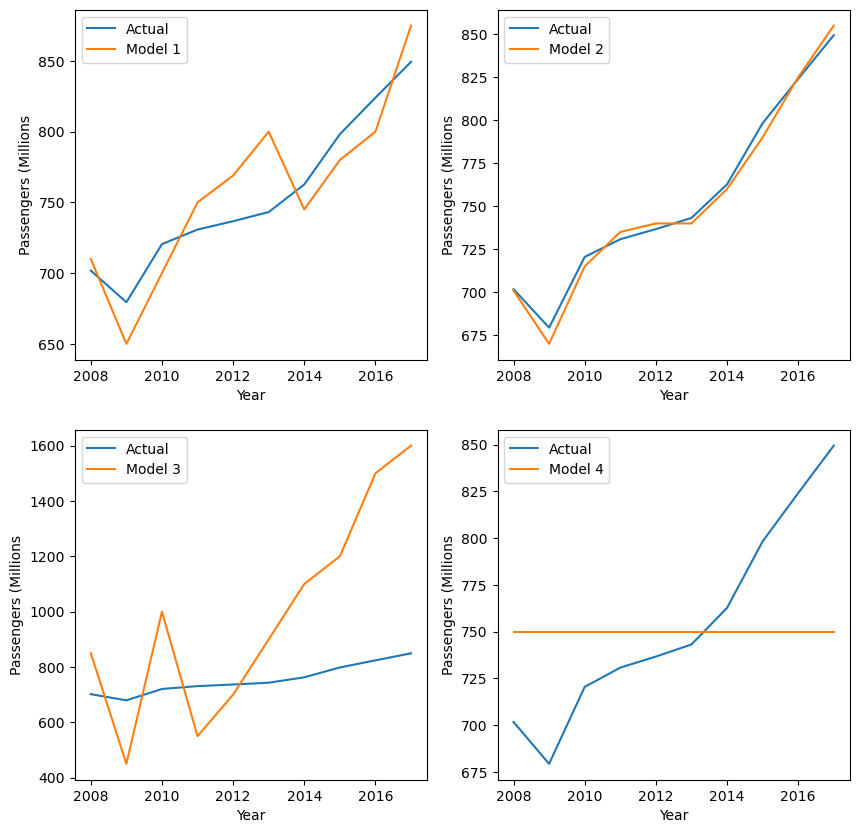

In [7]:
plt.figure(figsize=(10,10))

# Plot Actuals vs Predictions for each model 

for idx, model in enumerate(models):
    plt.subplot(2,2,idx+1)
    plt.plot(df['Passengers'], label='Actual')
    plt.plot(df[model.replace(' ', '') + '_Prediction'], label=model)
    plt.xlabel('Year')
    plt.ylabel('Passengers (Millions')
    plt.legend()

From the above plots we can observer that Model 1 and 2 seems to be the best performance. While Model 3 is not matching up with actuals and Model 4 is predicting a constant value. 

## Root Mean Square Error (RMSE)

In [8]:
for model in models: 
    print(model)
    mse = mean_squared_error(df['Passengers'],
                            df[model.replace(' ', '') + '_Prediction'])
    print(f' MSE: {mse:.2f}')
    print(f' RMSE: {mse**0.5:.2f}')
    

Model 1
 MSE: 787.38
 RMSE: 28.06
Model 2
 MSE: 26.54
 RMSE: 5.15
Model 3
 MSE: 150686.81
 RMSE: 388.18
Model 4
 MSE: 2661.81
 RMSE: 51.59


The best RMSE is usually the lowest. So we can confirm that `Model 2` is the most accuarte model.

## Residual Histograms
"A residual for an observation in the evaluation data is the difference between the true target and the predicted target.  The histogram of the residuals on the evaluation data when distributed in a bell shape and centered at zero indicates that the model makes mistakes in a random manner and does not systematically over or under predict any particular range of target values"<br>
Reference: https://docs.aws.amazon.com/machine-learning/latest/dg/regression-model-insights.html

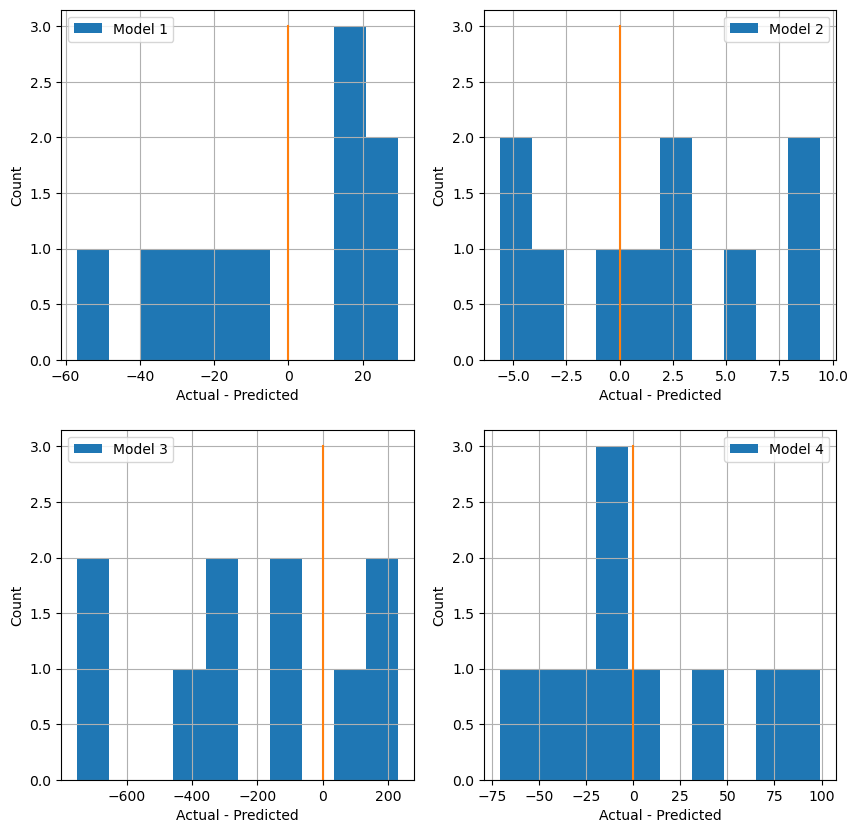

In [11]:
plt.figure(figsize=(10,10))

for idx, model in enumerate(models):
    plt.subplot(2,2,idx+1)
    residual = df['Passengers'] - df[model.replace(' ','') + '_Prediction']
        
    plt.hist(residual,
             label=model)
    plt.plot([0,0],[0,3])
    plt.xlabel('Actual - Predicted')
    plt.ylabel('Count')
    plt.grid()
    plt.legend()

In [13]:
# Let's print actual counts
# How many under predictions and over predictions
# Actual - Predicted
# Positive Value indicates Actual is more than predicted (under estimation)
# Negative Value indicates Actual is less than predicted (over estimation)
# Since our test dataset has only 10 samples, it hard to find patterns.
# But, even here, Model 3 appears to be different from other models
# as it over predicting for larger number of samples

for model in models:
    print (model)
    residual = df['Passengers'] - df[model.replace(' ','') + '_Prediction']
    # Count number of values greater than zero and less than zero
    value_counts = (residual > 0).value_counts(sort=False)
    
    print(' Under Estimation: ', value_counts[True]) # difference is greater than 0
    print(' Over  Estimation: ',  value_counts[False]) # difference is less than 0

Model 1
 Under Estimation:  5
 Over  Estimation:  5
Model 2
 Under Estimation:  6
 Over  Estimation:  4
Model 3
 Under Estimation:  3
 Over  Estimation:  7
Model 4
 Under Estimation:  4
 Over  Estimation:  6


<h2>Summary</h2>
In this example, Model 2 has the best performance followed by Model 1.

We can confirm this by visual observation using plots and by comparing RMSE metrics